In [ ]:
from igraph import *
import numpy as np
import networkx as nx
import igraph as ig
import cairocffi
import matplotlib.pyplot as plt
import pandas as pd

#### TASK 1

In [ ]:
# construct the graph with the given adjacency matrix

In [35]:
# using adjacency matrix :
alphabit = {
    'a' : 0, 'b' : 1, 'c' : 2, 'd' : 3, 'e' : 4, 'f' : 5, 'g' : 6, 'h' : 7, 'i': 8, 'j' : 9
}

adj2alph_map = [
    ('a', 'h', 8), 
    ('b', 'a', 3),
    ('c', 'a', 5), ('c', 'd', 5), ('c', 'e', 1),
    ('d', 'c', 6), ('d', 'f', 1),
    ('e', 'b', 6), ('e', 'c', 2),
    ('g', 'a', 7), ('g', 'b', 4), ('g', 'e', 8), ('g', 'h', 3),
    ('h', 'b', 3), ('h', 'f', 9),
    ('i', 'f', 4), ('j', 'f', 1)
]

adjacency_matrix = np.zeros(shape=(len(alphabit), len(alphabit)), dtype=int)

# create graph
for v1, v2, weight in adj2alph_map:
    adjacency_matrix[alphabit[v1], alphabit[v2]] = weight
    
g = ig.Graph.Adjacency((adjacency_matrix > 0).tolist())
g.vs['names'] = [key for key in alphabit.keys()]
g.es['weight'] = adjacency_matrix[adjacency_matrix.nonzero()]

In [2]:
G = nx.DiGraph(adjacency_matrix)
  
plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)

NameError: name 'df' is not defined

In [40]:
# using adjacency matrix :
alphabit = {
    'a' : 0, 'b' : 1, 'c' : 2, 'd' : 3, 'e' : 4, 'f' : 5, 'g' : 6, 'h' : 7, 'i': 8, 'j' : 9
}

adj2alph_map = [
    ('a', 'h', 8), 
    ('b', 'a', 3),
    ('c', 'a', 5), ('c', 'd', 5), ('c', 'e', 1),
    ('d', 'c', 6), ('d', 'f', 1),
    ('e', 'b', 6), ('e', 'c', 2),
    ('g', 'a', 7), ('g', 'b', 4), ('g', 'e', 8), ('g', 'h', 3),
    ('h', 'b', 3), ('h', 'f', 9),
    ('i', 'f', 4), ('j', 'f', 1)
]

adjacency_matrix = np.zeros(shape=(len(alphabit), len(alphabit)), dtype=int)

# create graph
for v1, v2, weight in adj2alph_map:
    adjacency_matrix[alphabit[v1], alphabit[v2]] = weight
    
g = ig.Graph.Adjacency((adjacency_matrix > 0).tolist())
g.vs['names'] = [key for key in alphabit.keys()]
g.es['weight'] = adjacency_matrix[adjacency_matrix.nonzero()]

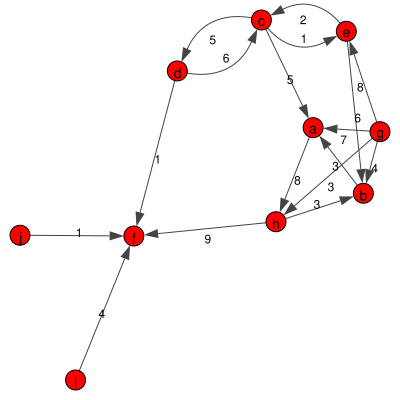

<Figure size 200x200 with 0 Axes>

In [102]:
# plot the graph
plt.figure(figsize=(2, 2))
ig.plot(g,
        vertex_size=20,
        vertex_label=g.vs['names'],
        edge_label=g.es['weight'],
        bbox=(400, 400)
        )

In [27]:
from scipy import sparse

In [47]:
# find diameter, radius, center, peripheral vertices of correspond graph

# diameter - d(G) = max d(u, v) 
diameter = g.diameter()

# radius - r(G) = min d(u, v)
radius = g.radius()

# center - v: r(v) == r(G)
centers = list( filter( None,
    [name if int(vertex.eccentricity()) == radius else None 
     for vertex, name in zip(g.vs, g.vs['names'])] ) )

# peripheral vertices
per_vs = list( filter( None,
    [name if int(vertex.eccentricity()) == diameter else None 
     for vertex, name in zip(g.vs, g.vs['names'])] ) )

# adjacency list
adj_list = {}
for vx, vxs in zip(alphabit.keys(), g.get_adjlist(mode="all")):
    adj_list[vx] = vxs
adj_list_df = pd.DataFrame(adj_list.items())
adj_list_df.to_csv('adj_list.csv')

# edge list
edge_list = g.get_edge_dataframe()
edge_list.to_csv('edge_list.csv')

# vertex list
vertex_list = g.get_vertex_dataframe()
vertex_list.to_csv('vertex_list.csv')

# incidence matrix
inc_matrix_df = pd.DataFrame(sparse.lil_matrix(nx.incidence_matrix(G)).toarray(), dtype=int)
inc_matrix_df.to_csv('inc_matrix_df.csv')

# vertex degrees list
vx_degrees = pd.DataFrame(G.degree, columns=['vertex', 'degree'])
vx_degrees.to_csv('vx_degrees.csv')

#### TASK 2

In [404]:
# Find graph articulation points and bridges
# plot and point out the objects

art_points = []
for point in g.articulation_points():
    art_points.append( list(alphabit.keys())[list(alphabit.values()).index(point)] )

bridges = []
for edge_index in g.bridges():
    edge_pair = g.get_edgelist()[edge_index]
    lit_a = list(alphabit.keys())[list(alphabit.values()).index(edge_pair[0])]
    lit_b = list(alphabit.keys())[list(alphabit.values()).index(edge_pair[1])]
    bridges.append((lit_a, lit_b))
    
    
print(f'A set of articulation points: {art_points}')
print(f'A set of bridges: {bridges}')

# => fixed

A set of articulation points: ['f']
A set of bridges: [('i', 'f'), ('j', 'f')]


In [503]:
vs_colors = ['red' for i in range(len(g.vs['names']))]
vs_colors[5] = 'blue'
es_colors = ['black' for i in range(len(g.get_edgelist()))]
for ind in g.bridges():
    es_colors[ind] = 'green'
g.vs['color'] = vs_colors
g.es['color'] = es_colors

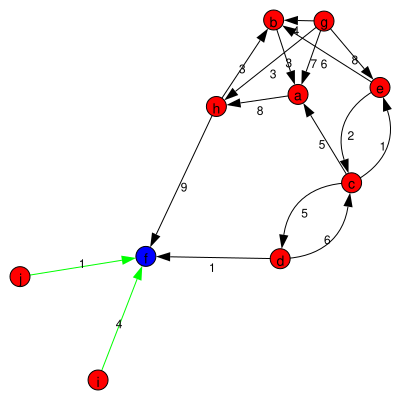

<Figure size 200x200 with 0 Axes>

In [505]:
# plot the graph
plt.figure(figsize=(2, 2))
ig.plot(g,
        vertex_size=20,
        vertex_label=g.vs['names'],
        edge_label=g.es['weight'],
        bbox=(400, 400)
        )

#### TASK 3

In [ ]:
# plot the graph given the hist : [0, 2, 10] of degrees 0, 1, 2

In [221]:
from random import sample
from copy import deepcopy

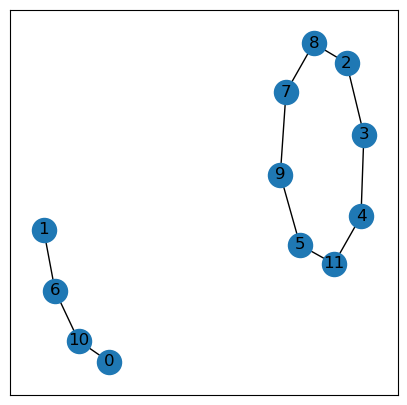

In [281]:
# you're welcome to play with built-in randomizer
# P.S. self implemented algorithms were less stable (unstable at all)
# but more elegant and original by graph construction
# nevertheless the former was used because i couldn't fix my algorithm (>ლ)

hist = {0 : 0, 1 : 2, 2 : 10}
degree_sequence = []
for key, num in hist.items():
    for i in range(num):
        degree_sequence.append(key)
        
degree_sequence = sample(degree_sequence, len(degree_sequence))
G = nx.configuration_model(degree_sequence)

plt.figure(figsize =(5, 5))
nx.draw_networkx(G, with_labels = True)

#### TASK 4

In [49]:
from itertools import product

13


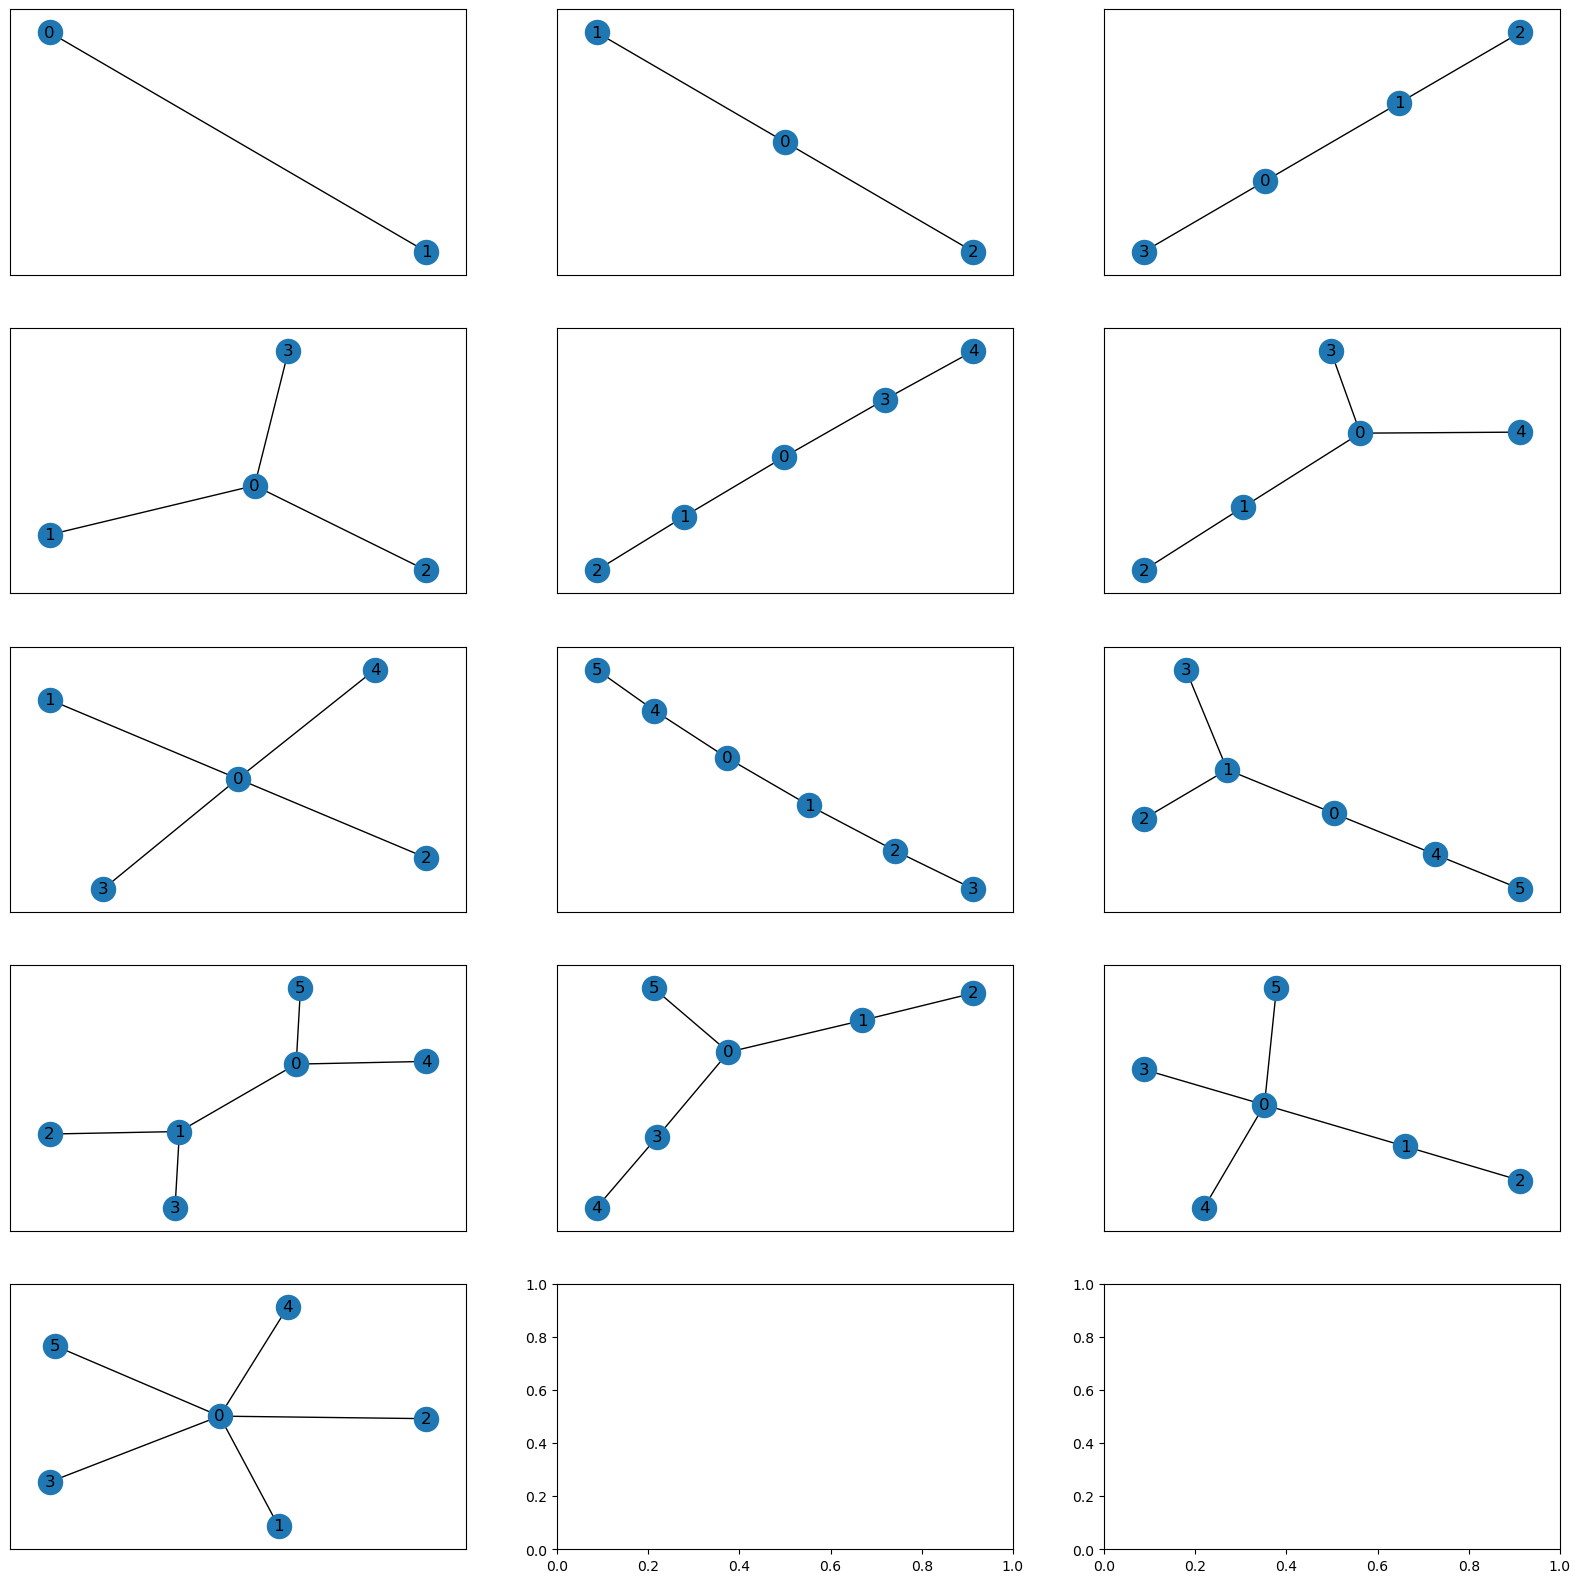

In [50]:
# construct all nonisomorhic trees with 6 or less nodes
from itertools import product

G = nx.DiGraph()
nodes = [i+2 for i in range(5)]

count = 0
for node in nodes:   
    for tree in nx.nonisomorphic_trees(node, ):
        count += 1
print(count)

fig, axes = plt.subplots( nrows=count // 3+1, ncols=3, figsize =(20, 20))

G = nx.DiGraph()
nodes = [i+2 for i in range(5)]

counter = 0
for node in nodes:   
    for tree in nx.nonisomorphic_trees(node):
        ax = axes[counter//3][counter%3]
        _ = nx.draw_networkx(tree, with_labels = True, ax=ax)
        counter += 1
    

#### TASK 5

In [183]:
# CALCULATE THE PROBABILITY THAT THERE IS A TRIANGLE IN A GRAPH 
# OF 5 NODES AND 6 EDGES

In [282]:
from itertools import combinations, product

In [355]:
%%time
# the most straightfull dumb approach -> calculate all combinations off grapgh
# with 5 nodes and 6 edges, calculate all combinations where a triangle is present
# calculate relation: | graphs that contain any triangle | / | all graphs |

nodes_num = 6
nodes = [n for n in range(nodes_num)]

edge_list = list(product(nodes, nodes))
for i, edge in enumerate(edge_list):
    if (i,i) in edge_list:
        edge_list.remove((i, i))
    if edge[::-1] in edge_list:
        edge_list.remove(edge)
        
all_possible_edge_combinations = list(combinations(edge_list, 5))

counter = 0
for combination in all_possible_edge_combinations:
    #print(combination)
    random_graph = Graph(edges=combination)
    random_graph.vs['names'] = nodes
    if random_graph.list_triangles():
        counter += 1

print(f'All combinations = {len(all_possible_edge_combinations)}, when a tringle occurs = {counter}')
print(f'Concrete dumb probability calculus: P[graph has triange] = {counter/len(all_possible_edge_combinations):.4f}')

All combinations = 3003, when a tringle occurs = 1230
Concrete dumb probability calculus: P[graph has triange] = 0.4096
CPU times: user 88.3 ms, sys: 3.81 ms, total: 92.1 ms
Wall time: 90 ms


#### TASK 6

In [ ]:
# FIND ALL SPANNING TREES OF THE GRAPH

In [64]:
from igraph import Graph

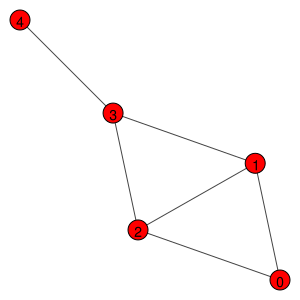

<Figure size 200x200 with 0 Axes>

In [102]:
edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4)]
nodes = 5

Gi = Graph.from_networkx(G)
Gi.vs['names'] = [node for node in range(nodes)]
    
# plot the graph
plt.figure(figsize=(2, 2))
ig.plot(Gi,
        vertex_size=20,
        vertex_label=Gi.vs['names'],
        #edge_label=G.es['weight'],
        bbox=(300, 300)
        ax
        )

In [114]:
from itertools import combinations

In [157]:
# check all possible combinations off subgraphs with nodes_num - 1 edges
# that is a condition for a tree

nodes_num = 5
list_of_trees = []

for combination in combinations(Gi.get_edgelist(), nodes_num-1):
    #print(combination)
    maybe_tree = Graph(edges=combination)
    maybe_tree.vs['names'] = Gi.vs['names']
    
    if maybe_tree.is_tree() and len(maybe_tree.get_vertex_dataframe().index)==nodes_num:
        list_of_trees.append(maybe_tree)
print(len(list_of_trees))

8


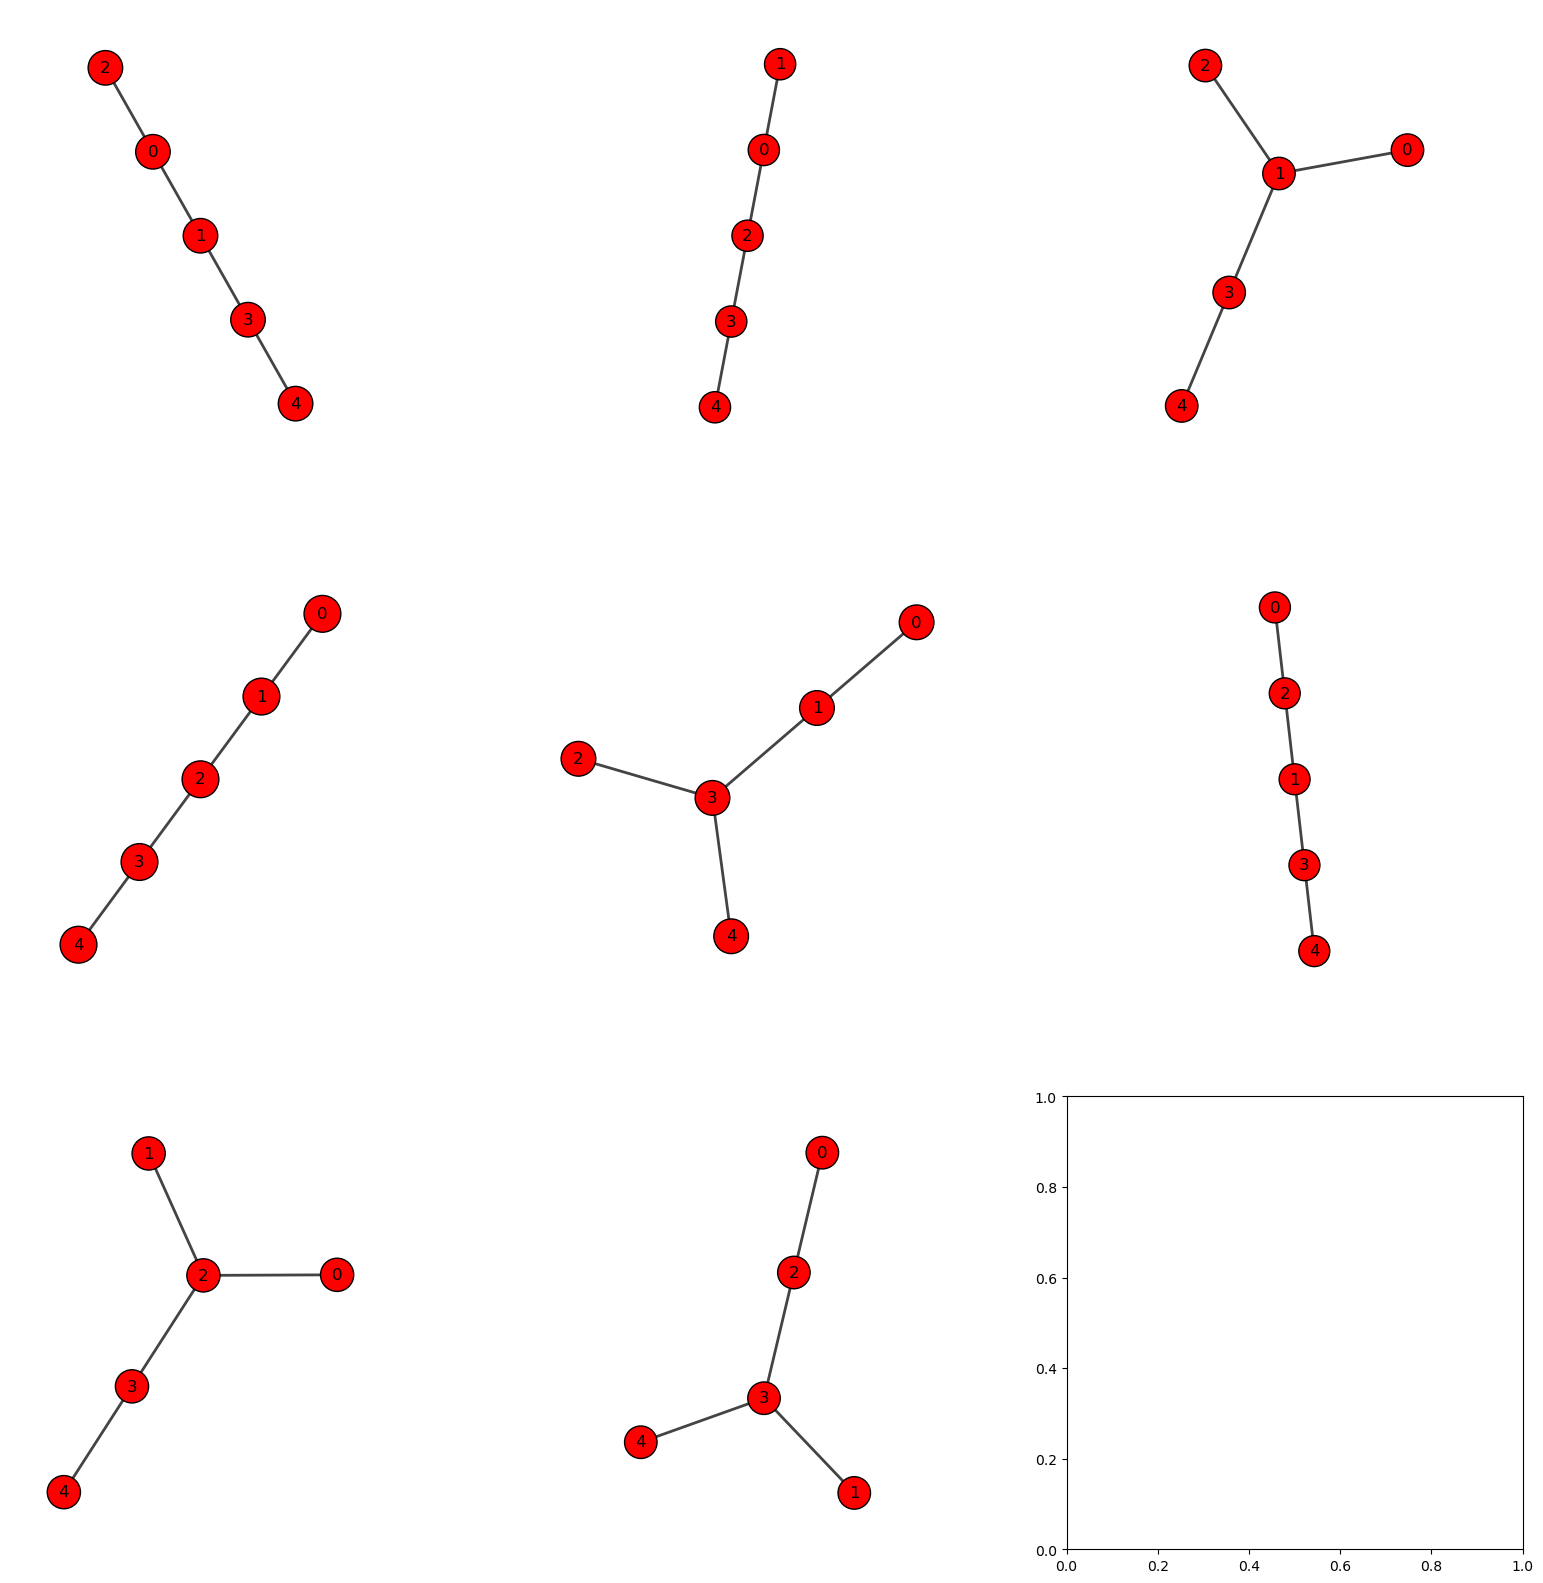

In [481]:
counts = len(list_of_trees)
fig, axes = plt.subplots( nrows=counts // 3+1, ncols=3, figsize =(20, 20))

counter = 0   
for tree in list_of_trees:
    ax = axes[counter//3][counter%3]
    _ = ig.plot(tree,
        target=ax,
        vertex_size=0.2,
        vertex_label=maybe_tree.vs['names'],
        bbox=(5000, 5000)
    )
    counter += 1

#### TASK 7

In [5]:
import ast

In [11]:
# read matrices, build graphs in circular layout

adj_matrix_g1 = pd.read_csv('adj_list.csv', index_col=0)
adj_matrix_g1.columns = ['vertex', 'adj_vertices']
edge_matrix_g1 = pd.read_csv('edge_list.csv', index_col=0)

In [12]:
adj_mx_g1 = np.zeros((adj_matrix_g1.shape[0], adj_matrix_g1.shape[0]), dtype=int)
for i, vx in enumerate(adj_matrix_g1['vertex']):
    for j in ast.literal_eval(adj_matrix_g1['adj_vertices'][i]):
        adj_mx_g1[i, j] = 1

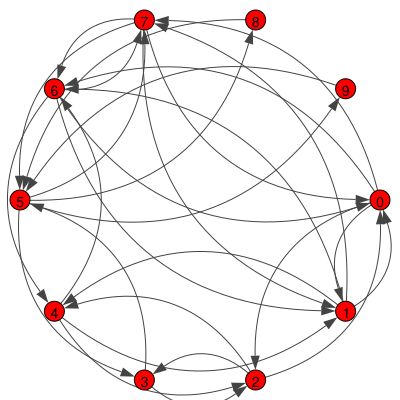

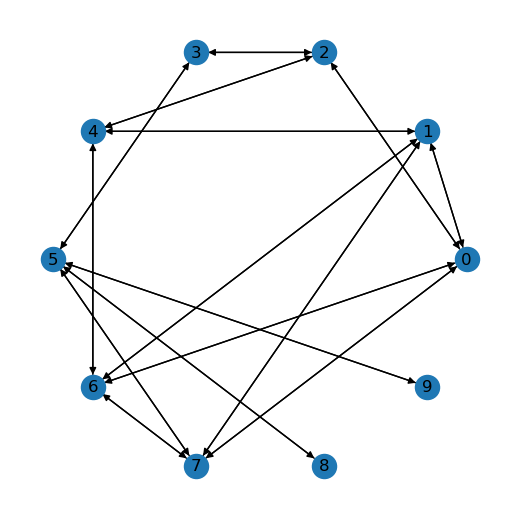

<Figure size 200x200 with 0 Axes>

In [20]:
g1 = ig.Graph.Adjacency((adj_mx_g1 > 0).tolist())
g1.vs['names'] = np.arange(10)

G = nx.DiGraph(adj_mx_g1)
G_circ = nx.circular_layout(G)

plt.figure(figsize =(5, 5))
nx.draw_circular(G, with_labels = True)

# plot the graph
plt.figure(figsize=(2, 2))
ig.plot(g1,
        vertex_size=20,
        vertex_label=g1.vs['names'],
        bbox=(400, 400),
        layout='circular',
        )

#### TASK 8

In [23]:
# calculate triangles and squares number for undirected graph
# suggest an algorithm with computational complexity less than O(n^3) - failed
# estimate by CC by formula: Trace(M^4) - sum(d_i ^2)

In [40]:
adj_matrix = np.asarray(list(g1.get_adjacency()))

triangles = set([])
counter = 0
for first_vertex in range(0, 2):#adj_matrix.shape[0], 2):
    neighbors = np.argwhere(adj_matrix[first_vertex] > 0)
    # neighbors = neighbors.reshape(neighbors.shape[0], neighbors.shape[-1])
    print(f'level 1 = {neighbors}, vertex = {first_vertex}')
    for second_vertex in neighbors[neighbors > first_vertex]:
        neighbors_2 = np.argwhere(adj_matrix[second_vertex])
        neighbors_2 = neighbors_2.reshape(neighbors_2.shape[0], neighbors_2.shape[-1])
        print(f'level 2 = {neighbors_2}, vertices = {first_vertex, second_vertex}')
        for third_vertex in neighbors_2[neighbors_2 > second_vertex]:
            print(f'level 3, vertices = {first_vertex, second_vertex, third_vertex}')
            if third_vertex in neighbors:
                vertices = tuple(sorted([first_vertex, second_vertex, third_vertex]))
                #print(tuple(sorted(vertices)))
                triangles.add(vertices)
                #print(f'trianlge = {first_vertex, second_vertex[0], third_vertex[0]}')
            counter += 1

level 1 = [[1]
 [2]
 [6]
 [7]], vertex = 0
level 2 = [[0]
 [4]
 [6]
 [7]], vertices = (0, 1)
level 3, vertices = (0, 1, 4)
level 3, vertices = (0, 1, 6)
level 3, vertices = (0, 1, 7)
level 2 = [[0]
 [3]
 [4]], vertices = (0, 2)
level 3, vertices = (0, 2, 3)
level 3, vertices = (0, 2, 4)
level 2 = [[0]
 [1]
 [4]
 [7]], vertices = (0, 6)
level 3, vertices = (0, 6, 7)
level 2 = [[0]
 [1]
 [5]
 [6]], vertices = (0, 7)
level 1 = [[0]
 [4]
 [6]
 [7]], vertex = 1
level 2 = [[1]
 [2]
 [6]], vertices = (1, 4)
level 3, vertices = (1, 4, 6)
level 2 = [[0]
 [1]
 [4]
 [7]], vertices = (1, 6)
level 3, vertices = (1, 6, 7)
level 2 = [[0]
 [1]
 [5]
 [6]], vertices = (1, 7)


In [41]:
triangles

{(0, 1, 6), (0, 1, 7), (0, 6, 7), (1, 4, 6), (1, 6, 7)}

In [42]:
adj_matrix = np.asarray(adj_matrix)

squares = set([])
for first_vertex in range(0, 2):#adj_matrix.shape[0], 2):
    neighbors = np.argwhere(adj_matrix[first_vertex] > 0)
    # neighbors = neighbors.reshape(neighbors.shape[0], neighbors.shape[-1])
    print(f'level 1 = {neighbors}, vertex = {first_vertex}')
    for second_vertex in neighbors[neighbors > first_vertex]:
        neighbors_2 = np.argwhere(adj_matrix[second_vertex])
        neighbors_2 = neighbors_2.reshape(neighbors_2.shape[0], neighbors_2.shape[-1])
        print(f'level 2 = {neighbors_2}, vertices = {first_vertex, second_vertex}')
        for third_vertex in neighbors_2[neighbors_2 > second_vertex]:
            neighbors_3 = np.argwhere(adj_matrix[third_vertex])
            neighbors_3 = neighbors_3.reshape(neighbors_3.shape[0], neighbors_3.shape[-1])
            print(f'level 3, vertices = {first_vertex, second_vertex, third_vertex}')
            for fourth_vertex in neighbors_3[neighbors_3 > third_vertex]:
                if fourth_vertex in neighbors:
                    vertices = tuple(sorted([first_vertex, second_vertex, third_vertex, fourth_vertex]))
                    #print(tuple(sorted(vertices)))
                    squares.add(vertices)
                    #print(f'trianlge = {first_vertex, second_vertex[0], third_vertex[0]}')
    print()

level 1 = [[1]
 [2]
 [6]
 [7]], vertex = 0
level 2 = [[0]
 [4]
 [6]
 [7]], vertices = (0, 1)
level 3, vertices = (0, 1, 4)
level 3, vertices = (0, 1, 6)
level 3, vertices = (0, 1, 7)
level 2 = [[0]
 [3]
 [4]], vertices = (0, 2)
level 3, vertices = (0, 2, 3)
level 3, vertices = (0, 2, 4)
level 2 = [[0]
 [1]
 [4]
 [7]], vertices = (0, 6)
level 3, vertices = (0, 6, 7)
level 2 = [[0]
 [1]
 [5]
 [6]], vertices = (0, 7)

level 1 = [[0]
 [4]
 [6]
 [7]], vertex = 1
level 2 = [[1]
 [2]
 [6]], vertices = (1, 4)
level 3, vertices = (1, 4, 6)
level 2 = [[0]
 [1]
 [4]
 [7]], vertices = (1, 6)
level 3, vertices = (1, 6, 7)
level 2 = [[0]
 [1]
 [5]
 [6]], vertices = (1, 7)



In [43]:
squares

{(0, 1, 4, 6), (0, 1, 6, 7), (0, 2, 4, 6), (1, 4, 6, 7)}

In [48]:
# estimation
adjacencty_4 = np.array(adj_matrix)
for i in range(3):
    adjacencty_4 = np.dot(adjacencty_4, adj_matrix)

sum_d2 = np.square(np.array(list(undirected_G.degree))[:,1:]).sum()
print(np.trace(adjacencty_4) - sum_d2)

130


#### TASK 10

In [51]:
# solve problem 4 for pseudograph
# no solution for the moment